# First Order Initial Value Problem


The more general form of a first order Ordinary Differential Equation is:
\begin{equation}
y^{'}=f(t,y).
\end{equation}
This can be solved analytically by integrating both sides but this is not straight forward for most problems.
Numerical methods can be used to approximate the solution at discrete points.

## Implict Euler method

The simplest one step numerical method is the Euler Method named after the most prolific of mathematicians [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (15 April 1707 – 18 September 1783) .

The general Euler formula for the first order differential equation
\begin{equation}
y^{'} = f(t,y),
\end{equation}
with the initial condition $y(t_0) =y_0$. Forward Euler method is given by
\begin{equation}
y_{i+1}=y_i+hf(t_{i+1},y_{i+1}).
\end{equation}

In [1]:
## Library
import numpy as np
import math
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

## Population growth

The general form of the population growth differential equation is:
\begin{equation}
y^{'}=\epsilon y
\end{equation}
where $\epsilon$ is the growth rate. The initial population at time $0$ is
\begin{equation}
y(0)=A,
 \end{equation}
Integrating gives  the general analytic (exact) solution:
\begin{equation}
 y=Ae^{\epsilon t}.
\end{equation}
We will use this equation to illustrate the application of the Euler method.
      
## Discrete Interval

The interval is $0\leq t \leq 2$ is discretised into $20$ subintervals with stepsize
\begin{equation}
 h=\frac{2-0}{20}=0.1,
\end{equation}
this gives the 21 discrete points:
\begin{equation}
 t_0=0, \ t_1=0.1, \ ... t_{20}=2.
\end{equation}
This is generalised to
\begin{equation}
t_i=0+i0.1, \ \ \ i=0,1,...,20.
\end{equation}
The plot below shows the discrete time steps.

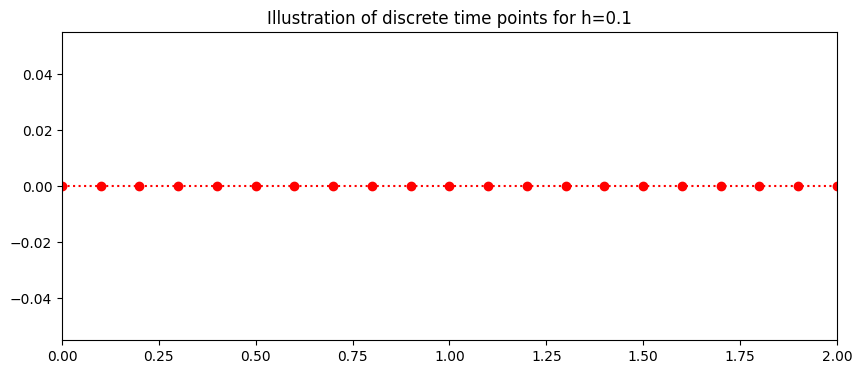

In [2]:
### Setting up time
t_end=2.0
t_start=0
N=20
h=(t_end-t_start)/(N)
time=np.arange(t_start,t_end+0.01,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Initial Condition
To get a specify solution to a first order initial value problem, an __initial condition__ is required.

For our population problem the intial condition is:
\begin{equation}
y(0)=10.
\end{equation}
This gives the analytic solution
\begin{equation}
y=10e^{\epsilon t}.
\end{equation}
### Growth rate
Let the growth rate
\begin{equation}
\epsilon=0.5
\end{equation}
giving the analytic solution.
\begin{equation}
y=10e^{0.5 t}.
\end{equation}
The plot below shows the exact solution on the discrete time steps.

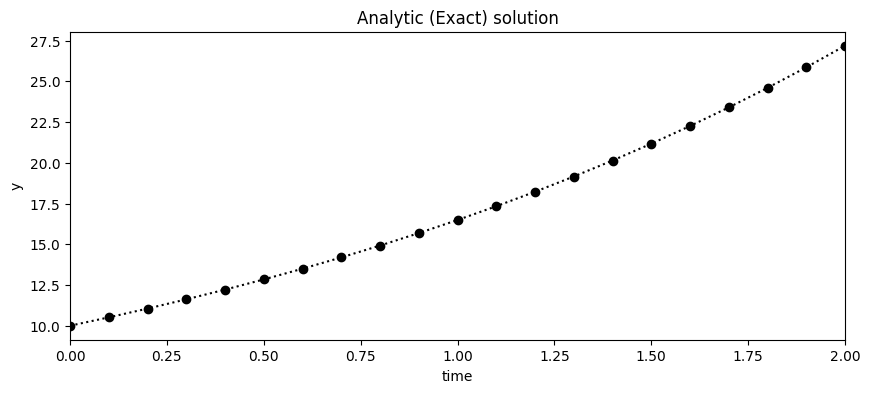

In [3]:
## Analytic Solution y
y_ex=10*np.exp(0.5*time)

fig = plt.figure(figsize=(10,4))
plt.plot(time,y_ex,'o:',color='black')
plt.xlim((0,2))
plt.xlabel('time')
plt.ylabel('y')
plt.title('Analytic (Exact) solution')
plt.plot();

## Numerical approximation of Population growth
The differential equation is transformed using the Euler method into a difference equation of the form
\begin{equation} y_{i+1}=y_{i}+h \epsilon y_{i+1}. \end{equation}
This approximates a sequence of values $ \ y_1, \ ..., y_{N}$.
For the specific example of the population equation the difference equation is
     \begin{equation} y_{i+1}=y_{i}+h 0.5 y_{i+1}. \end{equation}
where $y_0=10$. From this initial condition the series is approximated.
The plot below shows the exact solution $y$ in black circles and Euler approximation $w$ in blue squares.

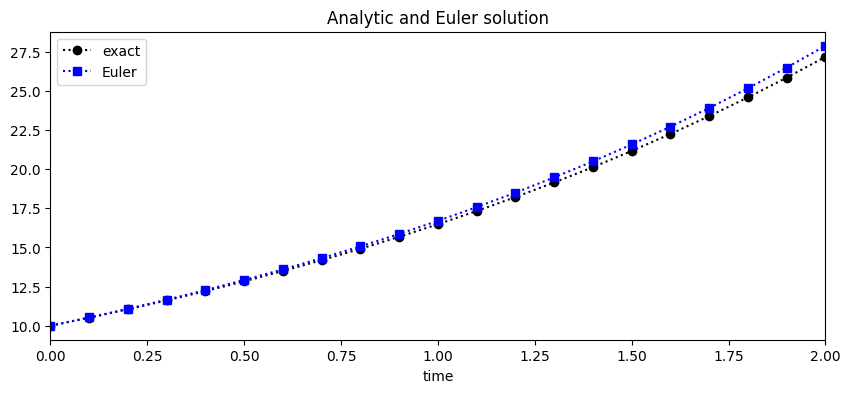

In [4]:
y=np.zeros(N+1)
y[0]=10
for i in range (0,N):
    y[i+1]=y[i]*(1/(1-0.5*h))

fig = plt.figure(figsize=(10,4))
plt.plot(time,y_ex,'o:',color='black',label='exact')
plt.plot(time,y,'s:',color='blue',label='Euler')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Analytic and Euler solution')
plt.plot();

## Global Error
The error does not stay constant accross the time this is illustrated in the figure below for the population growth equation. The actual error (red triangles) increases over time.

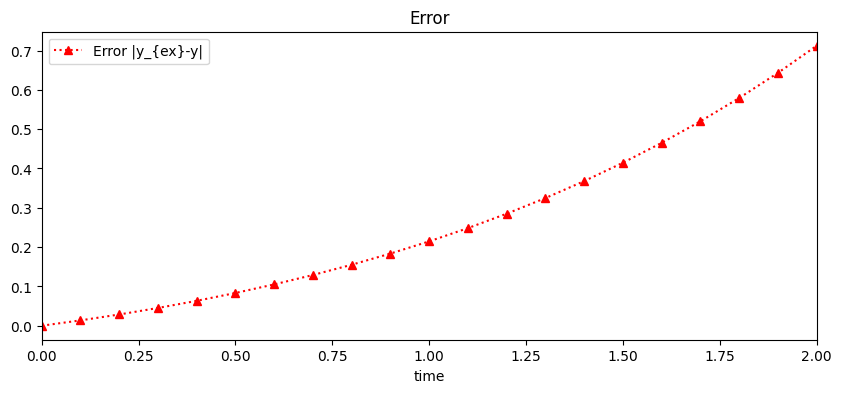

In [5]:
fig = plt.figure(figsize=(10,4))
plt.plot(time,np.abs(y-y_ex),'^:'
         ,color='red',label='Error |y_{ex}-y|')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Error')
plt.plot();

### Table
The table below shows the iteration $i$, the discrete time point t[i], the Euler approximation w[i] of the solution $y$, the exact error $|y-w|$.

In [6]:
d = {'time t_i': time[0:21],    'Euler (y_i) ':y[0:21],'Exact (y)':y_ex[0:21],'Exact Error (|yex_i-y_i|)':np.round(np.abs(y[0:21]-y_ex[0:21]),21)}
df = pd.DataFrame(data=d)
df

,time t_i,Euler (y_i),Exact (y),Exact Error (|yex_i-y_i|)
0,0.0,10.000000,10.000000,0.000000
1,0.1,10.526316,10.512711,0.013605
2,0.2,11.080332,11.051709,0.028623
3,0.3,11.663508,11.618342,0.045165
4,0.4,12.277377,12.214028,0.063349
5,0.5,12.923554,12.840254,0.083300
6,0.6,13.603741,13.498588,0.105153
7,0.7,14.319728,14.190675,0.129052
8,0.8,15.073398,14.918247,0.155151
9,0.9,15.866734,15.683122,0.183613
